In [1]:
import mlflow

In [2]:
mlflow.set_experiment(experiment_name = "Seed Germination Rate")

<Experiment: artifact_location='file:///d:/Mlflow/mlruns/325944852318647122', creation_time=1757588755056, experiment_id='325944852318647122', last_update_time=1757590356366, lifecycle_stage='active', name='Seed Germination Rate', tags={'mlflow.note.content': 'This is the description for the experiment',
 'new-tags': 'new_tag_updated_with_client',
 'new_tags': 'v1'}>

In [5]:
from xgboost.sklearn import XGBRegressor

In [6]:
xgb = XGBRegressor()

In [9]:
with mlflow.start_run(run_name = "ml logging") as run:
    mlflow.sklearn.log_model(sk_model = xgb, artifact_path = "XGB-model")

2025/09/11 21:43:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [10]:
from sklearn.datasets import load_iris

In [15]:
import pandas as pd

In [18]:
df = pd.read_excel(r"C:\Users\saqli\Desktop\New_dataset.xlsx")

In [19]:
df.head()

,seed,cultivar,size of each seed (mm),weight of each seed (gr),baseline SOD (u g-1),germination days,base germination rate,potential time,base germination potential,base germination index,...,power (w),pressure (kPa),gas flow rate (L/min),plasma time,seed number,water soaking time (h),water (ml),growing temp,germination rate,Unnamed: 28
0,Soybean,Sari,4.55,0.196,17.99,7.0,92.75,3.0,85.50,57.12,...,100.0,101.325,2.0,30,25,NaN,5.0,25,98.13,NaN
1,Soybean,Sari,4.25,0.175,10.65,7.0,94.13,3.0,88.25,58.34,...,100.0,101.325,2.0,30,25,NaN,5.0,25,97.25,NaN
2,Soybean,Saba,5.25,0.165,20.00,7.0,82.38,3.0,72.75,63.39,...,100.0,101.325,2.0,30,25,NaN,5.0,25,88.88,NaN
3,Soybean,Saba,5.05,0.146,24.00,7.0,86.76,3.0,79.50,50.61,...,100.0,101.325,2.0,30,25,NaN,5.0,25,92.25,NaN
4,Soybean,Arian,5.35,0.249,17.06,7.0,90.25,3.0,84.50,54.05,...,100.0,101.325,2.0,30,25,NaN,5.0,25,93.88,NaN


In [20]:
input = ['size of each seed (mm)', 'weight of each seed (gr)', 'germination days', 'base germination rate', 'base germination potential','power (w)']
target ='germination rate'

In [22]:
x = df[input]
y = df[target]

In [23]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   size of each seed (mm)      157 non-null    float64
 1   weight of each seed (gr)    157 non-null    float64
 2   germination days            157 non-null    float64
 3   base germination rate       157 non-null    float64
 4   base germination potential  131 non-null    float64
 5   power (w)                   157 non-null    float64
dtypes: float64(6)
memory usage: 7.5 KB


In [24]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 157 entries, 0 to 156
Series name: germination rate
Non-Null Count  Dtype  
--------------  -----  
157 non-null    float64
dtypes: float64(1)
memory usage: 1.4 KB


In [25]:
input_example = x.iloc[0:120]
print(input_example)

     size of each seed (mm)  weight of each seed (gr)  germination days  \
0                      4.55                    0.1960               7.0   
1                      4.25                    0.1750               7.0   
2                      5.25                    0.1650               7.0   
3                      5.05                    0.1460               7.0   
4                      5.35                    0.2490               7.0   
..                      ...                       ...               ...   
115                    2.50                    0.0033               5.0   
116                    2.50                    0.0033               2.5   
117                    2.50                    0.0033               3.0   
118                    2.50                    0.0033               3.5   
119                    2.50                    0.0033               5.0   

     base germination rate  base germination potential  power (w)  
0                    92.75     

In [32]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Assuming your data is in a pandas DataFrame called 'df'
# Replace 'target_column' with your actual target column name
# Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [33]:
# First, split your data into features (X) and target (y)
# For example:
# X = df.drop('target_column', axis=1)
# y = df['target_column']

# Initialize and train the model
xgb = XGBRegressor()
xgb.fit(X_train, y_train)  # Make sure to fit the model first

# Then log the model
with mlflow.start_run(run_id="e54222476fa54f82b0f176aaffe0a4d6") as run:
    mlflow.sklearn.log_model(
        sk_model=xgb,
        artifact_path=xgb.__class__.__name__,
        input_example=input_example
    )

Log Dictionary

In [37]:
with mlflow.start_run(run_id = "e54222476fa54f82b0f176aaffe0a4d6") as run:
    dictionary ={
        "predictions.csv" : r"C:\Users\saqli\Desktop\New_dataset.xlsx",
        "model.pkl" : r"C:\Users\saqli\Downloads\Cold Plasma\Cold Plasma\COld plasma new start\best_xgb_model.pkl"
    }

    mlflow.log_dict(dictionary = dictionary, artifact_file = "my_files.json")
    mlflow.log_dict(dictionary = dictionary, artifact_file = "my_files.yaml")

log a figure

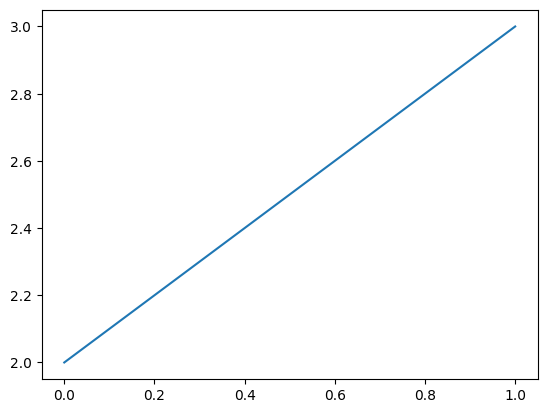

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot([0,1],[2,3])

with mlflow.start_run(run_name = "log_figure") as run:
    mlflow.log_figure(fig, artifact_file = "figures/ figure.png")